# Lab08 - Distances and PCA

Name: Dylan Zucker 

Class: CSCI 349 - Intro to Data Mining

Semester: 2019SP

Instructor: Brian King



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### 1. You will compute the distance matrix for data that is similar to a simple set shown in class, just a bit more extensive. This will give you an opportunity to understand how to perform proximity measurements on data with different types of variables on your own. First, set up a pandas data frame with the following 8 observations and 3 variables:

Set the types as follows:

test1: Nominal, levels = {"A", "B", "C"}

test2: Oridnal, levels = {"poor", "fair", "good", "excellent" }

test3: Numeric

Name the data frame df. Set the index correctly. Use the info() method to show the type of each variable in df when you have completed your dataframe.

In [2]:
#df = pd.DataFrame({"test1":["A","C","C","B","A", "B", "C", "B"], "test2": ["excellent", "fair", "good", "fair", "poor", "excellent", "good", "good"], "test3":[25, 32, 60, 53, 23, 37, 45, 49]})
test1_type = pd.api.types.CategoricalDtype(categories = ["A", "B", "C"])
test2_type = pd.api.types.CategoricalDtype(categories = ["poor", "fair", "good", "excellent"], ordered=True)
# Might not want .cat.codes
df = pd.DataFrame({"test1":pd.Series(["A","C","C","B","A", "B", "C", "B"]).astype(test1_type), \
                   "test2": pd.Series(["excellent", "fair", "good", "fair", "poor", "excellent", "good", "good"]).astype(test2_type), \
                   "test3":[25, 32, 60, 53, 23, 37, 45, 49]})
pd.to_numeric(df.test3)
df.index=["A1","A2","A3","A4","A5","A6","A7","A8"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, A1 to A8
Data columns (total 3 columns):
test1    8 non-null category
test2    8 non-null category
test3    8 non-null int64
dtypes: category(2), int64(1)
memory usage: 440.0+ bytes


### 2. Report the counts of each level of the categorical variables.

In [3]:
print(df.test1.value_counts())
print(df.test2.value_counts())

C    3
B    3
A    2
Name: test1, dtype: int64
good         3
excellent    2
fair         2
poor         1
Name: test2, dtype: int64


### 3. Report a cross tabulation (i.e. contingency table) between test1 and test2. Include the margins (i.e. the sum of the rows and the columns) in your reported table (HINT: Look up pandas crosstab() function)

In [4]:
pd.crosstab(df.test1, df.test2, margins=True)

test2,poor,fair,good,excellent,All
test1,,,,,
A,1,0,0,1,2
B,0,1,1,1,3
C,0,1,2,0,3
All,2,2,3,1,8


### 4. From the previous table, store the contingency table without the margins in a variable called observed

In [5]:
observed = pd.crosstab(df.test1, df.test2)

### 5. Run a chi-squared test for independence using the contingency table from the previous step. Clearly report the chi2 statistic, the p value, and the degrees of freedom, and then use the p-value to clearly state whether test1 and test2 are independent.

In [6]:
chi2, p_value, dof, ex = stats.chi2_contingency(observed)
print("Chi2 = ", chi2)
print("p value = ", p_value)
print("Degrees of Freedom: ", dof)
print("Not independent" if p_value > .5 else "Weakly Dependent" if p_value > .2 else "independent")

Chi2 =  6.444444444444444
p value =  0.37528525266160834
Degrees of Freedom:  6
Weakly Dependent


### 6. Use describe() to report the summary statistics of variable test3.

In [7]:
df.test3.describe()

count     8.000000
mean     40.500000
std      13.416408
min      23.000000
25%      30.250000
50%      41.000000
75%      50.000000
max      60.000000
Name: test3, dtype: float64

### 7. Now, you're going to explore some similarities between observations. Yes, this is a SMALL dataset! (Don't bother to explore large data until you can understand how they work on small, toy experimental data!) Before you can compute a pairwise distance matrix to report the distance between all pairs of observations, always remember that you can only compute distances between strictly numeric data. Therefore, you must convert your data to numeric types for ALL variables you want to include in your distance metric. 

### Create a new data frame called df_num, that represents a numeric version of the above. Let's begin by creating a version that stores all three variables above encoded as simple as possible. Do NOT rescale your data... yet!

### NOTE: If you do this from a dataframe that has the categorical variables set up properly, then this step is simple to do. The two choices I generally follow are either: 1) use the cat member of your categorical data, which stores a CategoricalAccessor object (look it up), or use one of the encoders in the sklearn.preprocessing module. The first option is easier, and yet another reason why it's so important to take the time to preprocess your data as correctly and error-free as possible.

### Your resulting data frame at the end of this step should be as follows:

In [8]:
df_num = pd.DataFrame({"test1": df.test1.cat.codes,"test2": df.test2.cat.codes, "test3": df.test3})
df_num

,test1,test2,test3
A1,0,3,25
A2,2,1,32
A3,2,2,60
A4,1,1,53
A5,0,0,23
A6,1,3,37
A7,2,2,45
A8,1,2,49


### 8. As you learned in lecture, you absolutely must rescale your data to fall on a similar scale. There are different approaches to doing so. A standardized zscore is among the most common, but not necessarily always the best approach, especially when you are dealing with numeric representations of true categorical data. Rescaling your data to all fall between 0 and 1 is also a common approach, particularly when you have categorical data.

### Let's first try to rescale our data to all fall between the values of 0 and 1. Use the MinMaxScaler in sklearn.preprocessing to rescale all variables to fall between 0 and 1. Store the transformed data as a pandas data frame called df_num_zeroone,. Your result should look as follows:

In [9]:
scale = MinMaxScaler()
#df_num_zeroone = pd.DataFrame({"test1":scale.fit_transform(df_num[["test1"]]), \
#                               "test2": scale.fit_transform(df_num[["test2"]]),\
#                               "test3": scale.fit_transform(df_num[["test3"]])})
df_num_zeroone = df_num
df_num_zeroone["test1"] = scale.fit_transform(df_num[["test1"]])
df_num_zeroone["test2"] = scale.fit_transform(df_num[["test2"]])
df_num_zeroone["test3"] = scale.fit_transform(df_num[["test3"]])
df_num_zeroone

/Users/Dylan/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Dylan/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Dylan/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,test1,test2,test3
A1,0.0,1.000000,0.054054
A2,1.0,0.333333,0.243243
A3,1.0,0.666667,1.000000
A4,0.5,0.333333,0.810811
A5,0.0,0.000000,0.000000
A6,0.5,1.000000,0.378378
A7,1.0,0.666667,0.594595
A8,0.5,0.666667,0.702703


### 9. Notice the value of test3. Quite often, when we have solid knowledge of what we expect our range to be, then we can rescale our data using that knowledge. In the case of test3, you learned that the data must fall between 0 and 100. Therefore, reassign test3 so that the min and max before rescaling are assuming to be between 0 and 100, respectively. (i.e. simply divide the original variable by 100!)

In [10]:
df_num_zeroone["test3"] = df["test3"]/100
df_num_zeroone

,test1,test2,test3
A1,0.0,1.000000,0.25
A2,1.0,0.333333,0.32
A3,1.0,0.666667,0.60
A4,0.5,0.333333,0.53
A5,0.0,0.000000,0.23
A6,0.5,1.000000,0.37
A7,1.0,0.666667,0.45
A8,0.5,0.666667,0.49


### 10. Compute a single distance matrix called distmat_zeroone. Use a standard Euclidean distance measure. Your reported result should be an 8x8 matrix with appropriately labeled rows and columns. (HINT – study the output of the distance matrix functions! They do not output a square matrix. Look at the squareform function. The pdist and squareform functions are in scipy.spatial.distance).

In [11]:
distmat_zeroone = distance.pdist(df_num_zeroone, "euclidean")
distmat_zeroone = distance.squareform(distmat_zeroone)
distmat_zeroone = pd.DataFrame(distmat_zeroone, index = df.index, columns=df.index)
distmat_zeroone

,A1,A2,A3,A4,A5,A6,A7,A8
A1,0.000000,1.203887,1.110680,0.879116,1.000200,0.514198,1.072898,0.647079
A2,1.203887,0.000000,0.435329,0.542310,1.057928,0.834832,0.357786,0.624509
A3,1.110680,0.435329,0.000000,0.604989,1.257515,0.643437,0.150000,0.511957
A4,0.879116,0.542310,0.604989,0.000000,0.671648,0.685598,0.606227,0.335725
A5,1.000200,1.057928,1.257515,0.671648,0.000000,1.126765,1.221820,0.872952
A6,0.514198,0.834832,0.643437,0.685598,1.126765,0.000000,0.606227,0.354275
A7,1.072898,0.357786,0.150000,0.606227,1.221820,0.606227,0.000000,0.501597
A8,0.647079,0.624509,0.511957,0.335725,0.872952,0.354275,0.501597,0.000000


### 11. Output the top three closest pairs of observations. You MUST write Python code to report these results! Do not simply print out your distance matrix and tell me your answers! Consider that this may have been thousands of observations! Always generate reported answers in code! For each pair, output the pair of observations from the original dataframe, and the distance between them.


In [12]:
def find_n_smallest(dist, df, n):
    n_smallest = []
    rows_cols = []
    for i in range(n):
        n_smallest.append(dist.min().min())
        col = dist.min().idxmin()
        row = dist[col].idxmin()
        dist[col][row] = np.nan
        dist[row][col] = np.nan
        rows_cols.append((row,col))
    for i in range(len(n_smallest)):
        print("Closest # " + str(i) + ": " + str(rows_cols[i]) + " dist = " + str(n_smallest[i]))
        print(pd.DataFrame(df.loc[rows_cols[i][0]]).T)
        print(pd.DataFrame(df.loc[rows_cols[i][1]]).T)

copy = distmat_zeroone[distmat_zeroone>0]
find_n_smallest(copy, df, 3)

Closest # 0: ('A7', 'A3') dist = 0.14999999999999997
   test1 test2 test3
A7     C  good    45
   test1 test2 test3
A3     C  good    60
Closest # 1: ('A8', 'A4') dist = 0.33572475498704457
   test1 test2 test3
A8     B  good    49
   test1 test2 test3
A4     B  fair    53
Closest # 2: ('A8', 'A6') dist = 0.35427547348230465
   test1 test2 test3
A8     B  good    49
   test1      test2 test3
A6     B  excellent    37


### 12. Output the top three observations that are least similar, with the two most distant observations output first. Again, for each pair, output the two observations, and the distance between them

In [13]:
def find_n_largest(dist, df, n):
    n_biggest = []
    rows_cols = []
    for i in range(n):
        n_biggest.append(dist.max().max())
        col = dist.min().idxmax()
        row = dist[col].idxmax()
        dist[col][row] = np.nan
        dist[row][col] = np.nan
        rows_cols.append((row,col))
    for i in range(len(n_biggest)):
        print("Furthest # " + str(i) + ": " + str(rows_cols[i]) + " dist = " + str(n_biggest[i]))
        print(pd.DataFrame(df.loc[rows_cols[i][0]]).T)
        print(pd.DataFrame(df.loc[rows_cols[i][1]]).T)

copy = distmat_zeroone[distmat_zeroone>0]
find_n_largest(copy, df, 3)

Furthest # 0: ('A3', 'A5') dist = 1.2575151865661283
   test1 test2 test3
A3     C  good    60
   test1 test2 test3
A5     A  poor    23
Furthest # 1: ('A7', 'A5') dist = 1.2218201358810732
   test1 test2 test3
A7     C  good    45
   test1 test2 test3
A5     A  poor    23
Furthest # 2: ('A6', 'A5') dist = 1.2038872224774397
   test1      test2 test3
A6     B  excellent    37
   test1 test2 test3
A5     A  poor    23


### 13. Repeat that exercise, however, now follow a strict binarization approach. Recall what binarization is! For each categorical variable, create a new set of variables that will store the occurrence of a distinct value in that variable.

### For example, test1 has three distinct values, "A", "B", and "C". Therefore, you should end up with three new variables that replace the one categorical variable. Best practice is to name your variables accordingly, with the variable name prefix, and the value as a suffix, usually with an _ in between. Thus, your result for the first variable should look like:

### Do this for BOTH categorical variables test1, and test2. However, test3 is already numeric, and we scaled it between zero-one already. Thus just copy the result of test3 from the previous data frame from the zero-one scaling.

### HINT - HOW? One approach is to use OneHotEncoder from sklearn.preprocessing. For this purpose, you can set the parameter sparse=False so that you can easily view the data, and set your dtype=int.

### Your result should look something like the following:

### Another approach is to use the pandas function get_dummies().

In [14]:
test1_bin = pd.get_dummies(df.test1)
test2_bin = pd.get_dummies(df.test2)
test1_bin.columns = ["test1_"+x for x in test1_bin.columns] 
test2_bin.columns = ["test2_"+x for x in test2_bin.columns]
df_binarized = pd.concat([test1_bin, test2_bin, df_num_zeroone.test3], axis=1)
df_binarized
    

,test1_A,test1_B,test1_C,test2_poor,test2_fair,test2_good,test2_excellent,test3
A1,1,0,0,0,0,0,1,0.25
A2,0,0,1,0,1,0,0,0.32
A3,0,0,1,0,0,1,0,0.60
A4,0,1,0,0,1,0,0,0.53
A5,1,0,0,1,0,0,0,0.23
A6,0,1,0,0,0,0,1,0.37
A7,0,0,1,0,0,1,0,0.45
A8,0,1,0,0,0,1,0,0.49


### 14. Now, rerun your same exact results as with your zero-one scaled data. Report the three closest pairs, and the three most distant pairs.

In [15]:
n_smallest = []
n_biggest = []
rows_cols = []
distmat_bin = pd.DataFrame(distance.squareform(distance.pdist(df_binarized, "euclidean")), index = df_binarized.index, columns=df_binarized.index)
copy = distmat_bin[distmat_bin>0]
find_n_smallest(copy, df, 3)
find_n_largest(copy, df, 3)

Closest # 0: ('A7', 'A3') dist = 0.14999999999999997
   test1 test2 test3
A7     C  good    45
   test1 test2 test3
A3     C  good    60
Closest # 1: ('A5', 'A1') dist = 1.4143549766589716
   test1 test2 test3
A5     A  poor    23
   test1      test2 test3
A1     A  excellent    25
Closest # 2: ('A8', 'A4') dist = 1.4147791347061915
   test1 test2 test3
A8     B  good    49
   test1 test2 test3
A4     B  fair    53
Furthest # 0: ('A3', 'A5') dist = 2.033937068839643
   test1 test2 test3
A3     C  good    60
   test1 test2 test3
A5     A  poor    23
Furthest # 1: ('A4', 'A5') dist = 2.0303940504246953
   test1 test2 test3
A4     B  fair    53
   test1 test2 test3
A5     A  poor    23
Furthest # 2: ('A8', 'A5') dist = 2.0303940504246953
   test1 test2 test3
A8     B  good    49
   test1 test2 test3
A5     A  poor    23


### 15. Take a moment and compare and contrast your results. Which method do you think have the better results? Why?

The binarized one is better, because the test3 top far values are further than the original case.

### 16. Which variable do you think was the distinguishing player in affecting the different outcomes between both of the above approaches to transforming your data to numeric results? Why?

test3 became more important in the binarized version, because it wasn't binarized it was it's normal value.

#### For this next exercise, you are going to use the dataset built into the seaborn library, called 'car_crashes'.

### 17. Load in your next dataset using the following:

In [16]:
df_car_crashes = sns.load_dataset('../data/car_crashes')
df_car_crashes.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


### 18. Preprocess your data. Minimally, you should move the state code to become the index for the dataframe, and then drop that column from your data.

In [17]:
df_car_crashes.set_index(["abbrev"], inplace = True)
#df_car_crashes = df_car_crashes.drop("abbrev")
df_car_crashes.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


### 19. Create a scatter plot of insurance premiums vs. insurance losses, with total number of accidents as the size of the point. and create a label next to every point representing the two letter state code. (NOTE: You'll likely have to rescale your point sice when you pass

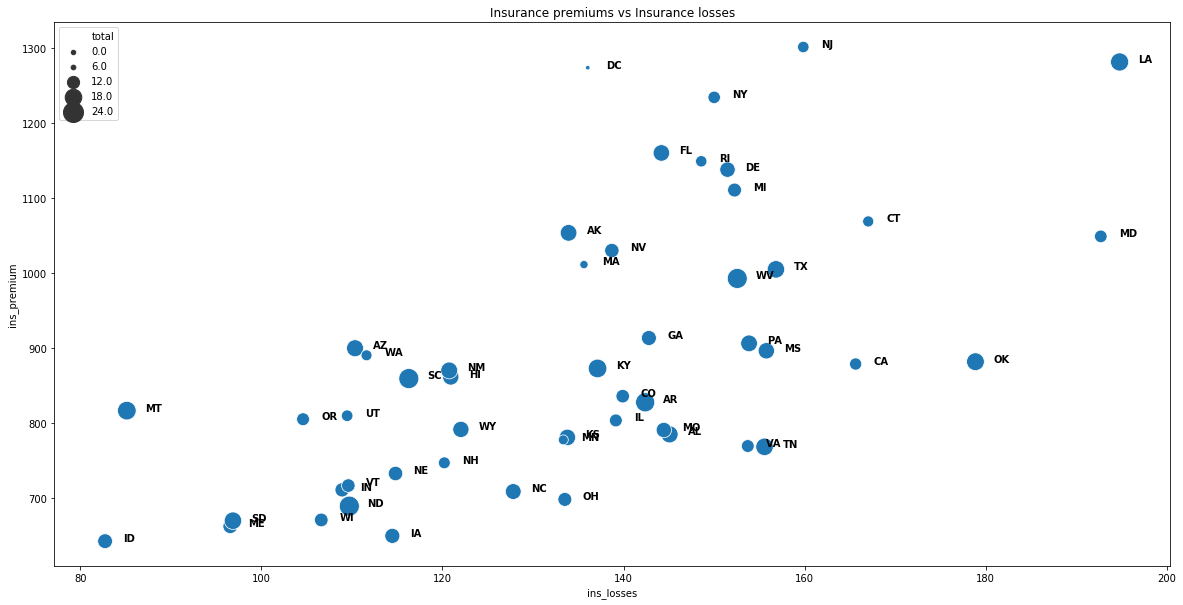

In [18]:
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(x="ins_losses", y="ins_premium", size="total", sizes = (20,400), data = df_car_crashes )
types = np.array(df_car_crashes.index)

for row in range(df_car_crashes.shape[0]):
    ax1.text(df_car_crashes.ins_losses[row]+2, df_car_crashes.ins_premium[row], df_car_crashes.index[row], horizontalalignment="left", size="medium", weight="semibold", color="black")
ax1.set_title("Insurance premiums vs Insurance losses")
plt.show()

### 20. Generate two interesting scatterplots that show some relationships between variables in the data. Try to use as many variables as you can without creating chaos! Your aim is to derive meaning from your data. Good visualizations tell a story. Strive to use at least one additional variable as size, color, or shape in your data, so you can show more than just 2 variables on a single plot. Remember, sometimes this can just confuse, so do not go overboard unless it really adds something. Be sure to add legends and colorbors and axis labels and titles, and etc!

### Then, write a single sentence in markdown that draws a conclusion from your plot.

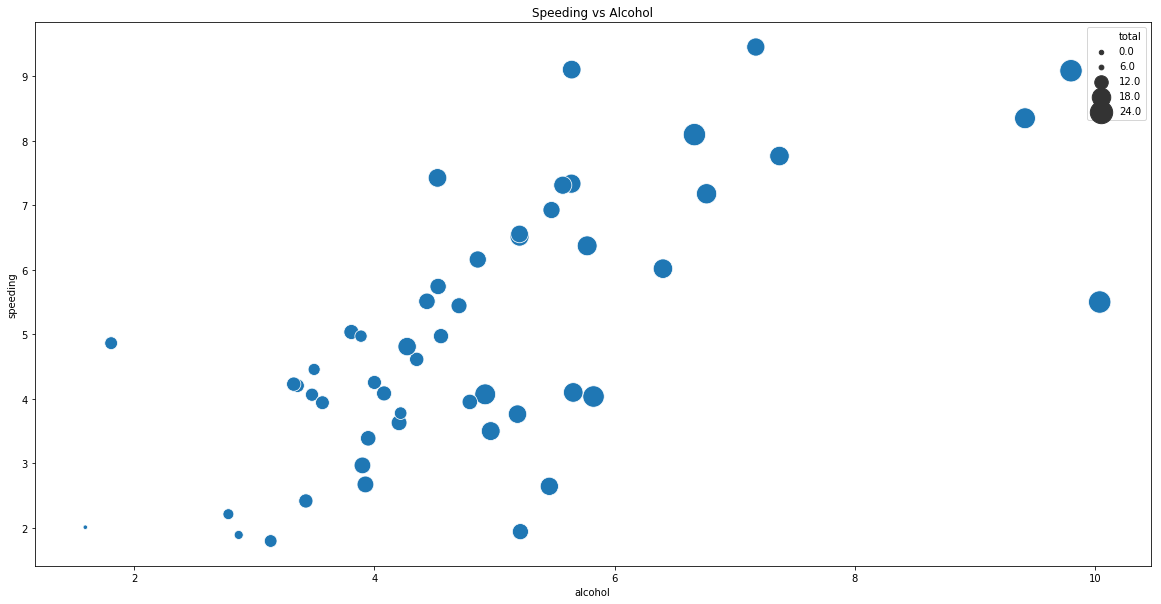

In [19]:
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(x = "alcohol", y = "speeding", size="total", sizes = (20,500), data = df_car_crashes )
ax1.set_title("Speeding vs Alcohol")
plt.show()

It seems that as speeding and alcohol increase, so does the total number of accidents.

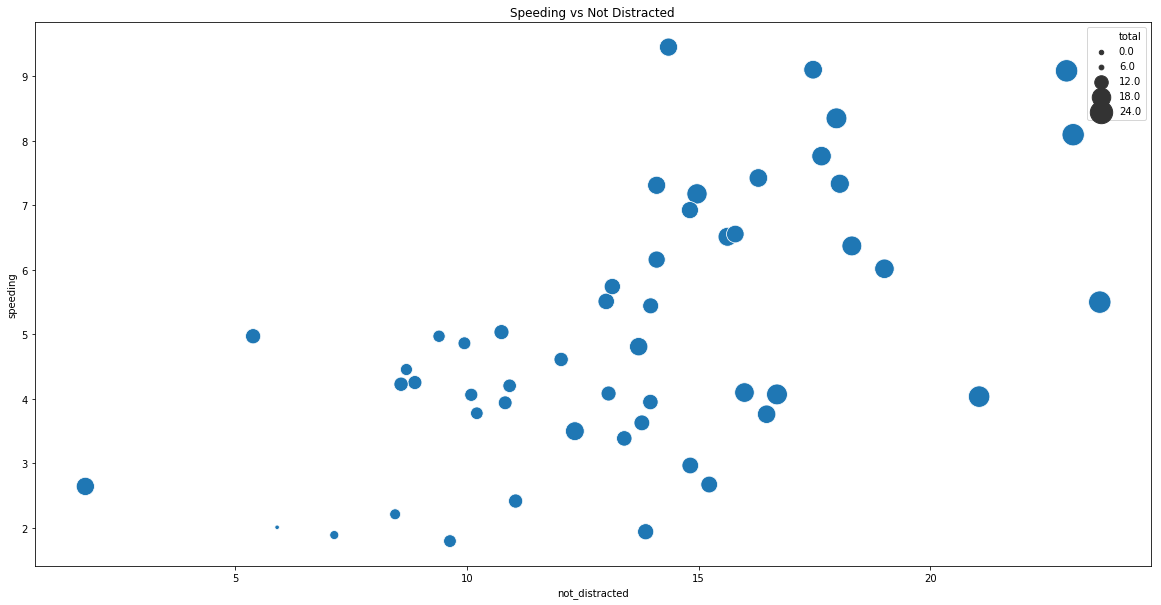

In [20]:
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(x = "not_distracted", y = "speeding", size="total", sizes = (20,500), data = df_car_crashes )
ax1.set_title("Speeding vs Not Distracted")
plt.show()

It seems that speeding is a bigger cause for accidents, than being distracted, because when drivers are not distracted and speeding there are more accidents than when drivers are distracted and not speeding.

### 21. Since all of the data are numeric, create a zscore transformation, storing the new dataframe as df_car_crashes_zscore. Report summary statistics on the transformed data.

In [21]:
df_car_crashes_zscore = pd.DataFrame(stats.zscore(df_car_crashes))
df_car_crashes_zscore.describe()

,0,1,2,3,4,5,6
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,6.291264e-16,-2.612289e-17,-1.839487e-16,-3.782377e-16,3.287131e-16,3.635436e-16,-2.068062e-16
std,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,-2.423242e+00,-1.604809e+00,-1.923831e+00,-2.645993e+00,-2.174301e+00,-1.387777e+00,-2.104130e+00
25%,-7.448923e-01,-6.165054e-01,-5.798646e-01,-6.932781e-01,-7.127632e-01,-6.713940e-01,-8.071227e-01
50%,-4.660081e-02,-1.953063e-01,-1.943724e-01,6.357267e-02,-6.167066e-02,-1.585346e-01,6.330968e-02
75%,6.639414e-01,7.211710e-01,4.189107e-01,5.749341e-01,7.377755e-01,6.853269e-01,7.066285e-01
max,1.987020e+00,2.228278e+00,3.008718e+00,2.259537e+00,1.951700e+00,2.348268e+00,2.451560e+00


### 22. Now, run a full PCA on the transformed data. Set n_components to be the same number of components as the original data. Be sure to fit the data to your PCA model, and then output the components, explained variance, and the explained variance ratio.

In [22]:
# SOURCE
# Tutorial found at https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(n_components = df_car_crashes.shape[1])
principal_components = pca.fit_transform(df_car_crashes_zscore)
df_principal = pd.DataFrame(principal_components, columns = ["principal_comp_"+str(i) for i in range(df_car_crashes.shape[1])])
df_principal.head(10) # MORE BELLOW

,principal_comp_0,principal_comp_1,principal_comp_2,principal_comp_3,principal_comp_4,principal_comp_5,principal_comp_6
0,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
1,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
2,1.432172,-0.420506,0.338136,0.552513,0.168718,-0.804523,-0.076107
3,2.491584,0.348968,-1.788747,0.264064,-0.372382,-0.481849,-0.147636
4,-1.750638,0.633625,-0.136176,-0.974916,-0.315811,0.178510,-0.068958
5,-0.925120,-0.154388,0.146177,-0.568096,0.116420,-0.240859,-0.098428
6,-2.125359,1.370600,0.743078,-0.485553,-0.088337,0.486531,0.020256
7,0.324658,1.574245,0.440982,0.338057,0.095481,-0.466100,-0.188961
8,-4.635926,0.918997,0.720078,1.184313,-0.172554,-0.052800,-0.124806
9,0.495689,1.435282,-0.661126,1.185136,-0.108007,-0.244305,-0.086714


In [23]:
pca.explained_variance_

array([4.0942308 , 1.6095732 , 0.56161403, 0.35753958, 0.2863854 ,
       0.20263316, 0.02802383])

In [24]:
pca.explained_variance_ratio_

array([0.57342168, 0.22543042, 0.07865743, 0.05007557, 0.04011   ,
       0.02837999, 0.00392491])

### 23. Use your intuition – what do the weights of the first couple of components suggest explains most of the variance in the data?

The first component contains 57.3% of the variance. The second contains 22.54% of the variance. So the variance is explained mostly from those two components.  

### 24. Create a plot of the cumulative sum of the explained variance. How many components will get you to 90% of the explained variance?

It will take 4 components to get 90%

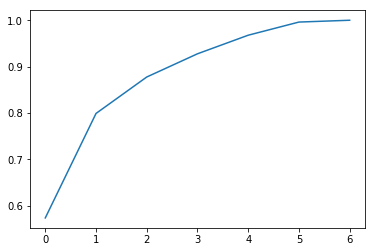

In [25]:
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.show()

### 25. Transform the original data using your PCA model (i.e. using the transform function of the pca object.)

### (NOTE: I often just store the transformed data temporarily as some arbitrary variable to make it easier to manipulate the data for plotting.)

In [26]:
transformed = pd.DataFrame(pca.transform(df_car_crashes), columns=["principal_comp_"+str(i) for i in range(df_car_crashes.shape[1])])

### 26. Generate a 2D plot using the first two principal components as your x and y coordinates. Be sure to label each point, and label your axes as component 1 and component 2, respectively.

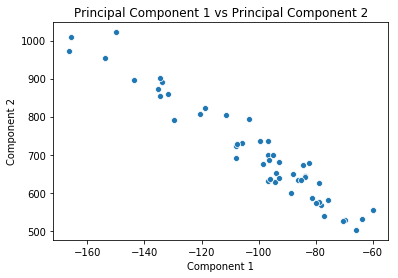

In [27]:
ax1 = sns.scatterplot(x = "principal_comp_0", y = "principal_comp_1", data = transformed)
ax1.xlabel = "Component 1"
ax1.set_xlabel("Component 1")
ax1.set_ylabel("Component 2")
ax1.set_title("Principal Component 1 vs Principal Component 2")
plt.show()

### 27. Observe your plot, and report three "interesting" states from your data that represent some extreme values or outliers from the trends.

There are points all the way past -160 and and past -60 on the xaxis. There are also points past 1000 and 500 on the yaxis.

### 28. Read how to generate a 3D scatterplot, and use it to generate a scatterplot of the first 3 components.

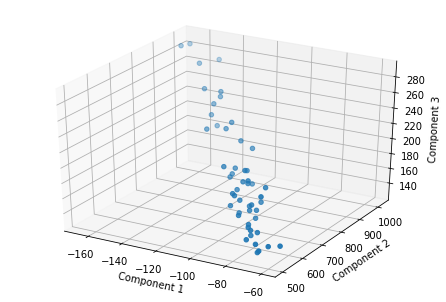

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(transformed["principal_comp_0"], transformed["principal_comp_1"], transformed["principal_comp_2"])
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.show()

### 29. Do the same outliers still stand out?

Yes.